# Title

** Basic Multi-classification**

# Description
The goal of the exercise is to get comfortable using multiclass classification models.


# Instructions:
We are trying to predict the types of Irises in the classic <a href="https://en.wikipedia.org/wiki/Iris_flower_data_set" target="_blank">Iris data set</a> based on measured characteristics
- Load the Iris data set and convert to a data frame.
- Fit  multinomial & OvR logistic regressions and a $k$-NN model.
- Compute the accuracy of the models.
- Plot the classification boundaries against the two predictors used.

# Hints:

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html" target="_blank">sklearn.LogisticRegression()</a> : Generates a Logistic Regression classifier

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression.fit" target="_blank">sklearn.fit()</a> : Fits the model to the given data

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression.predict" target="_blank">sklearn.predict()</a> : Predict using the estimated model (Logistic or knn classifiers) to perform pure classification predictions

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression.predict_proba" target="_blank">sklearn.predict_proba()</a> : Predict using the estimated model (Logistic or knn classifiers) to perform probability predictions of all the classes in the response (they should add up to 1 for each observation)

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html" target="_blank">sklearn.LogisticRegression.coef_ and .intercept_</a> : Pull off the estimated $\beta$ coefficients in a Logistic Regression model

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression.score" target="_blank">sklearn.score()</a> : Accuracy classification score.

<a href="https://matplotlib.org/3.3.2/api/_as_gen/matplotlib.pyplot.pcolormesh.html" target="_blank">matplotlib.pcolormesh()</a> : Accuracy classification score


In [1]:
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

## Irises

Read in the data set and convert to a Pandas data frame:

In [3]:
raw = datasets.load_iris()
iris = pd.DataFrame(raw['data'],columns=raw['feature_names'])
iris['type'] = raw['target']
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),type
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Note: this violin plot is 'inverted': putting the response variable in the model on the x-axis.  This is fine for exploration

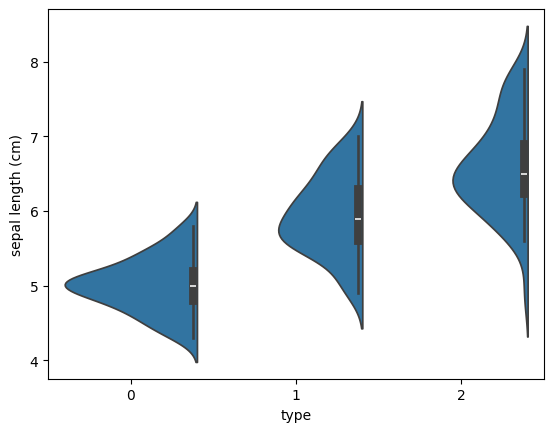

In [4]:
sns.violinplot(y=iris['sepal length (cm)'], x=iris['type'], split=True);

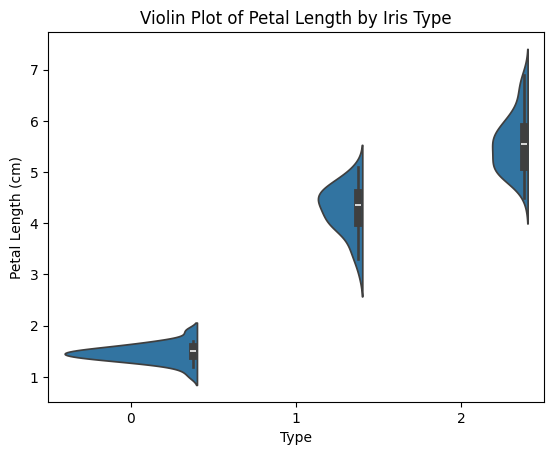

In [5]:
# Create a violin plot to compare petal length
# across the types of irises

sns.violinplot(y=iris['petal length (cm)'], x=iris['type'], split=True)
plt.xlabel('Type')
plt.ylabel('Petal Length (cm)')
plt.title('Violin Plot of Petal Length by Iris Type')
plt.show()

Here we fit our first model (the OvR logistic) and print out the coefficients:

In [6]:
logit_ovr = LogisticRegression(multi_class='ovr',max_iter = 1000).fit(
    iris[['sepal length (cm)','sepal width (cm)']], iris['type'])
print(logit_ovr.intercept_)
print(logit_ovr.coef_)


[  8.32330389   5.68606727 -12.52969694]
[[-3.38829757  3.1645277 ]
 [ 0.12717258 -2.38536149]
 [ 2.221959   -0.51270438]]


In [7]:
# we can predict classes or probabilities
print(logit_ovr.predict(iris[['sepal length (cm)','sepal width (cm)']])[0:5])
print(logit_ovr.predict_proba(iris[['sepal length (cm)','sepal width (cm)']])[0:5])

[0 0 0 0 0]
[[0.84359784 0.11125052 0.04515164]
 [0.69397793 0.27009468 0.0359274 ]
 [0.80138302 0.17827983 0.02033715]
 [0.77760633 0.20572616 0.01666751]
 [0.87799134 0.08771118 0.03429748]]


In [8]:
# and calculate accuracy
print(logit_ovr.score(iris[['sepal length (cm)','sepal width (cm)']],iris['type']))

0.8066666666666666


Now it's your turn: but this time with the multinomial logistic regression.

In [9]:
### edTest(test_multinomial) ###

# Fit the model and print out the coefficients
logit_multi = LogisticRegression(multi_class='multinomial', max_iter=1000).fit(iris[['sepal length (cm)', 'sepal width (cm)']], iris['type'])
intercept = logit_multi.intercept_
coefs = logit_multi.coef_
print(intercept)
print(coefs)

[ 7.91322129  1.84504714 -9.75826843]
[[-2.70890249  2.32402378]
 [ 0.61273259 -1.57058803]
 [ 2.0961699  -0.75343574]]


In [10]:
### edTest(test_multinomialaccuracy) ###

multi_accuracy = logit_multi.score(iris[['sepal length (cm)', 'sepal width (cm)']], iris['type'])
print(multi_accuracy)

0.82


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


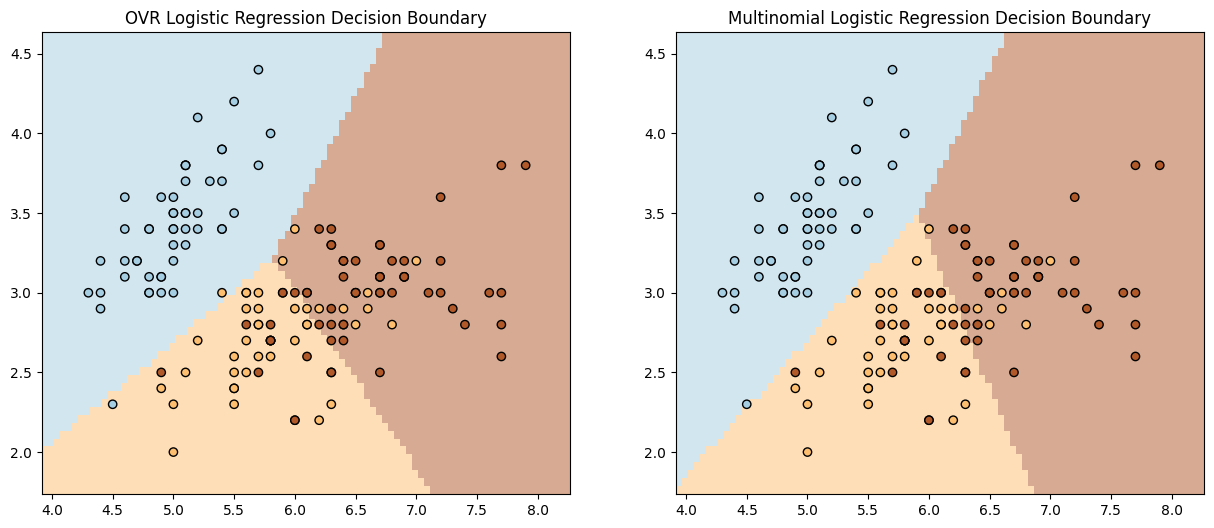

In [11]:
# Plot the decision boundary
x1_range = iris['sepal length (cm)'].max() - iris['sepal length (cm)'].min()
x2_range = iris['sepal width (cm)'].max() - iris['sepal width (cm)'].min()
x1_min, x1_max = iris['sepal length (cm)'].min() - 0.1 * x1_range, iris['sepal length (cm)'].max() + 0.1 * x1_range
x2_min, x2_max = iris['sepal width (cm)'].min() - 0.1 * x2_range, iris['sepal width (cm)'].max() + 0.1 * x2_range

step = 0.05
x1x, x2x = np.meshgrid(np.arange(x1_min, x1_max, step), np.arange(x2_min, x2_max, step))
y_hat_ovr = logit_ovr.predict(np.c_[x1x.ravel(), x2x.ravel()])
y_hat_multi = logit_multi.predict(np.c_[x1x.ravel(), x2x.ravel()])

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot for OVR logistic regression
ax1.pcolormesh(x1x, x2x, y_hat_ovr.reshape(x1x.shape), cmap=plt.cm.Paired, alpha=0.5)
ax1.scatter(iris['sepal length (cm)'], iris['sepal width (cm)'], c=iris['type'], edgecolors='k', cmap=plt.cm.Paired)
ax1.set_title('OVR Logistic Regression Decision Boundary')

# Plot for Multinomial logistic regression
ax2.pcolormesh(x1x, x2x, y_hat_multi.reshape(x1x.shape), cmap=plt.cm.Paired, alpha=0.5)
ax2.scatter(iris['sepal length (cm)'], iris['sepal width (cm)'], c=iris['type'], edgecolors='k', cmap=plt.cm.Paired)
ax2.set_title('Multinomial Logistic Regression Decision Boundary')

plt.show()

In [12]:
#fit a knn model (k=5) for the same data
knn5 = KNeighborsClassifier(n_neighbors=5).fit(iris[['sepal length (cm)', 'sepal width (cm)']], iris['type'])

In [13]:
### edTest(test_knnaccuracy) ###

#Calculate the accuracy
knn5_accuracy = knn5.score(iris[['sepal length (cm)', 'sepal width (cm)']], iris['type'])
print(knn5_accuracy)

0.84


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


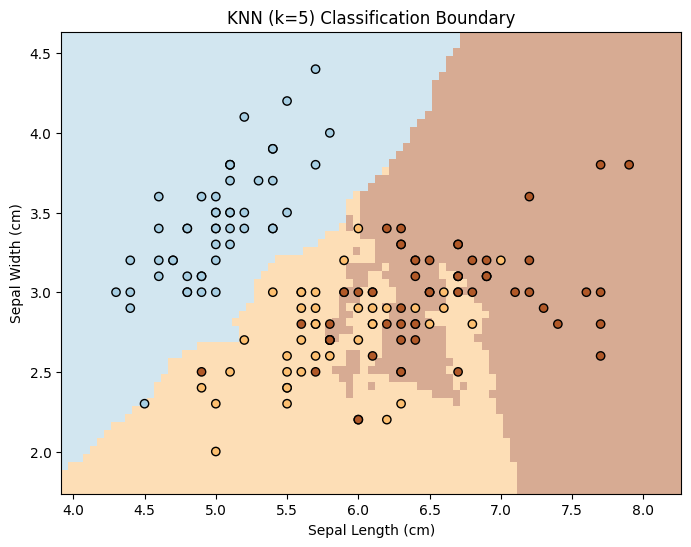

In [14]:
# Plot the classification boundary
x1_range = iris['sepal length (cm)'].max() - iris['sepal length (cm)'].min()
x2_range = iris['sepal width (cm)'].max() - iris['sepal width (cm)'].min()
x1_min, x1_max = iris['sepal length (cm)'].min() - 0.1 * x1_range, iris['sepal length (cm)'].max() + 0.1 * x1_range
x2_min, x2_max = iris['sepal width (cm)'].min() - 0.1 * x2_range, iris['sepal width (cm)'].max() + 0.1 * x2_range

step = 0.05
x1x, x2x = np.meshgrid(np.arange(x1_min, x1_max, step), np.arange(x2_min, x2_max, step))
y_hat_knn5 = knn5.predict(np.c_[x1x.ravel(), x2x.ravel()])

fig, ax1 = plt.subplots(1, 1, figsize=(8, 6))

ax1.pcolormesh(x1x, x2x, y_hat_knn5.reshape(x1x.shape), cmap=plt.cm.Paired, alpha=0.5)
# Plot also the training points
ax1.scatter(iris['sepal length (cm)'], iris['sepal width (cm)'], c=iris['type'], edgecolors='k', cmap=plt.cm.Paired)

plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('KNN (k=5) Classification Boundary')

plt.show()